# 1. Listing all files

In [1]:
ls

all_real.png    decompose.png  FC.csv         Keras.ipynb     real_pred.png
arima_pred.png  FC2.csv        food_model.h5  Plain Text.txt  results.csv


In [2]:
import time
start_time=time.time()

In [3]:
import pandas as pd

# 2. Importing data

In [4]:
df=pd.read_csv("./FC.csv")
df.head()

,date,q
0,2010-09-30,202.35
1,2010-10-01,206.40
2,2010-10-04,210.21
3,2010-10-05,208.67
4,2010-10-06,208.94


In [5]:
df=df.dropna(how="all")
df.head()

,date,q
0,2010-09-30,202.35
1,2010-10-01,206.40
2,2010-10-04,210.21
3,2010-10-05,208.67
4,2010-10-06,208.94


In [6]:
df.isnull().sum()

date    0
q       6
dtype: int64

In [7]:
df=df[~df["q"].isnull()]

# 3. Importing LIbraries

In [8]:
# http://gonzalopla.com/deep-learning-nonlinear-regression/
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler

from matplotlib import pyplot as plt

import matplotlib

from keras.layers import Dense, Dropout, Activation, LSTM
from keras.models import Sequential

from keras.models import load_model
from keras import optimizers

Using TensorFlow backend.


# 4. Ploting all real data

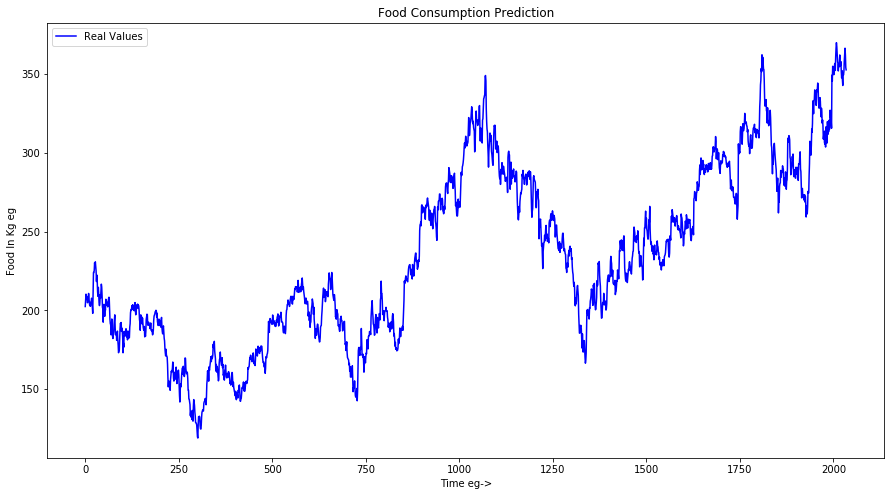

In [9]:
plt.figure(figsize=(15,8))
all_real_food=df["q"]
plt.plot(all_real_food, color="blue", label="Real Values")
plt.title('Food Consumption Prediction')
plt.xlabel('Time eg->')
plt.ylabel('Food In Kg eg')
plt.legend()


In [10]:
plt.savefig("./all_real.png")

<Figure size 432x288 with 0 Axes>

In [11]:
plt.show()

# 5. Getting a copy of data for ARIM 

In [12]:
df2=pd.read_csv("./FC.csv")
df2.head()

,date,q
0,2010-09-30,202.35
1,2010-10-01,206.40
2,2010-10-04,210.21
3,2010-10-05,208.67
4,2010-10-06,208.94


In [13]:
df2=df2.set_index("date")
df2.head()

,q
date,
2010-09-30,202.35
2010-10-01,206.40
2010-10-04,210.21
2010-10-05,208.67
2010-10-06,208.94


# 6. Splitting data for training and testing

In [14]:
ratio=80/100

start=0
total=len(df2.index)
mid=int(total*ratio)

len(df2.index[start:mid])

1628

In [15]:
len(df2.index[mid:total])

407

In [16]:
#Removing null value 

df2 = df2[pd.notnull(df2['q'])]

# 7. ARIMA Modeling

In [17]:
from pyramid.arima import auto_arima

/home/boo/anaconda3/envs/keras/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [18]:
arima_model = auto_arima(df2, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                            )
print(arima_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=12023.838, BIC=12051.882, Fit time=4.414 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=13301.226, BIC=13312.444, Fit time=0.094 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=12781.140, BIC=12803.575, Fit time=1.828 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=12021.816, BIC=12044.251, Fit time=2.833 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=12022.142, BIC=12050.186, Fit time=5.799 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=13297.271, BIC=13314.098, Fit time=0.300 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=12022.076, BIC=12050.121, Fit time=13.984 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=12025.731, BIC=12059.385, Fit time=11.281 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=12021.699, BIC=12038.525, Fit time=1.842 seconds
Fit ARIM

In [19]:
train = df2.iloc[start:mid]
test = df2.iloc[mid:]

# 8. Fitting model

In [20]:
arima_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [21]:
arima_food =arima_model.predict(n_periods=60)

# 9. Ploting ARIMA prediction

In [22]:
df_test=pd.read_csv("FC2.csv")
real_food=df_test.iloc[:, 1:2].values

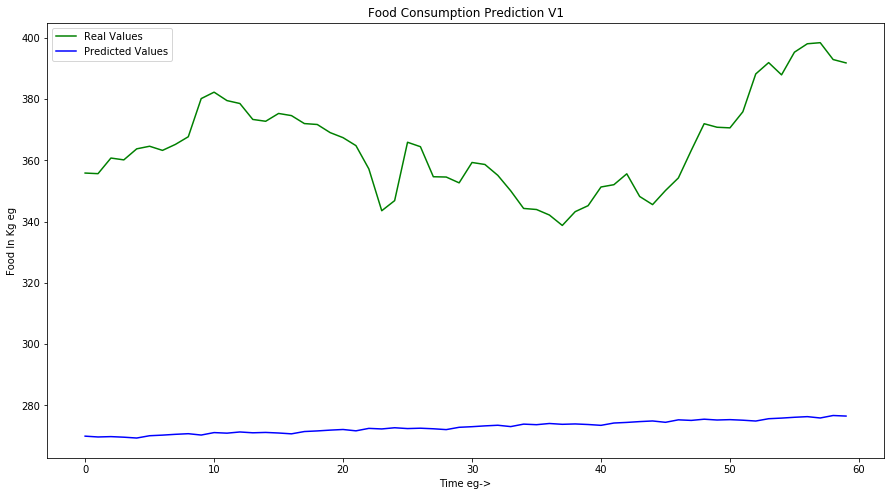

In [23]:
plt.figure(figsize=(15,8))
    
plt.plot(real_food, color="green", label="Real Values")
plt.plot(arima_food, color="blue", label="Predicted Values")
plt.title('Food Consumption Prediction V1')
plt.xlabel('Time eg->')
plt.ylabel('Food In Kg eg')
plt.legend()
plt.show()

In [24]:
plt.savefig("./arima_pred.png")
plt.show()

<Figure size 432x288 with 0 Axes>

# 10. Decomposing trends and seasonality

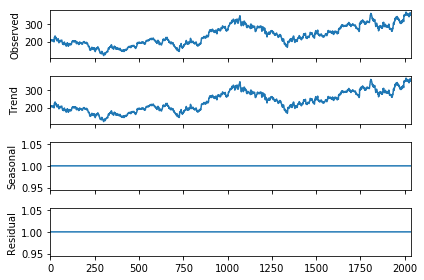

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(all_real_food, model="multiplicative", freq=1)
resplot=result.plot()

In [26]:
resplot.savefig("./decompose.png", dpi=300)
# resplot.show()

# LSTM STARTED 

# 2.1.  Scaling data

In [27]:
y=df.iloc[:,1:2].values
y

array([[202.35],
       [206.4 ],
       [210.21],
       ...,
       [362.15],
       [354.2 ],
       [352.75]])

In [28]:
sc=MinMaxScaler(feature_range=(0,1))
y_scaled=sc.fit_transform(y)
y_scaled

array([[0.3326035 ],
       [0.34872611],
       [0.36389331],
       ...,
       [0.96875   ],
       [0.93710191],
       [0.93132962]])

# 2.2 Making memory vectors

In [29]:
X_train=[]
y_train=[]


for i in range(60,len(df)):
    X_train.append(y_scaled[i-60:i, 0])
    y_train.append(y_scaled[i, 0])
X_train, y_train=np.array(X_train), np.array(y_train)

X_train.shape

(1969, 60)

In [30]:
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1969, 60, 1)

# 2.3 Making model and saving it

# 2.4 Retriving model and predicting

In [31]:
# returns a compiled model
# identical to the previous one
model = load_model('./food_model.h5')

In [32]:
df_test=pd.read_csv("FC2.csv")
real_food=df_test.iloc[:, 1:2].values


In [33]:
df_full = pd.concat((df['q'], df_test['q']), axis = 0)
inputs = df_full[len(df_full)-len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)


In [34]:
X_test=[]

for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_food = model.predict(X_test)
predicted_food = sc.inverse_transform(predicted_food)

# 2.5 Ploting real vs Predicted value for LSTM model

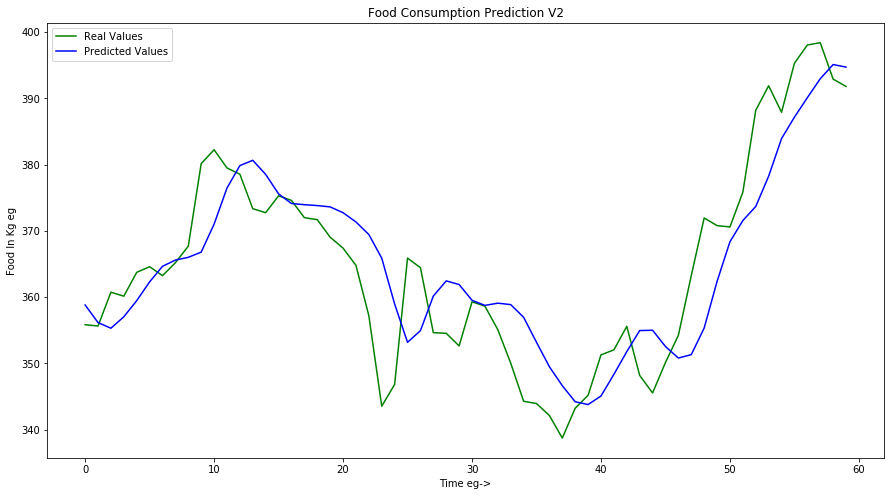

In [35]:
predicted=model.predict(X_test)
plt.figure(figsize=(15,8))    
plt.plot(real_food, color="green", label="Real Values")
plt.plot(predicted_food, color="blue", label="Predicted Values")
plt.title('Food Consumption Prediction V2')
plt.xlabel('Time eg->')
plt.ylabel('Food In Kg eg')
plt.legend()

In [36]:
plt.savefig("./real_pred.png")
plt.show()

<Figure size 432x288 with 0 Axes>

# 2.6 Finding error percentage

In [37]:
rf=np.reshape(real_food, real_food.shape[0])
pf=np.reshape(predicted_food, predicted_food.shape[0])
rf=list(rf)
pf=list(pf)

In [38]:

df_p=pd.DataFrame({"real": rf, "predicted": pf})
df_p.head()

,real,predicted
0,355.85,358.820282
1,355.65,356.173462
2,360.75,355.316071
3,360.15,357.046783
4,363.75,359.473236


In [39]:
df_p["error"]=df_p["predicted"]-df_p["real"]
df_p.head()

,real,predicted,error
0,355.85,358.820282,2.970282
1,355.65,356.173462,0.523462
2,360.75,355.316071,-5.433929
3,360.15,357.046783,-3.103217
4,363.75,359.473236,-4.276764


In [40]:
df_p["error%"]=100*(df_p["error"]/df_p["real"])
df_p.head()

,real,predicted,error,error%
0,355.85,358.820282,2.970282,0.834701
1,355.65,356.173462,0.523462,0.147185
2,360.75,355.316071,-5.433929,-1.506287
3,360.15,357.046783,-3.103217,-0.861646
4,363.75,359.473236,-4.276764,-1.175743


In [41]:
df_p.to_csv("./results.csv")

# 2.6 Time Taken

In [42]:
end_time=time.time()

print("Time for executiopn", int(end_time-start_time),"seconds")

Time for executiopn 79 seconds
